In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Straight to the example

In [2]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()
digits.data.shape

(1797, 64)

Project to 2 dimensions

In [7]:
pca = PCA( 2 ) 
projected = pca.fit_transform( digits.data )
print( projected.shape )

(1797, 2)


We can plot the first two principal components of each point to learn about the data

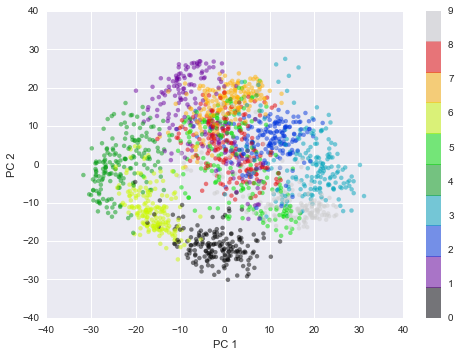

In [8]:
plt.scatter( projected[:,0], projected[:,1], c = digits.target, edgecolor = 'none',
             alpha = 0.5, cmap = plt.cm.get_cmap('nipy_spectral', 10) )
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar();

#### Choosing the number of components

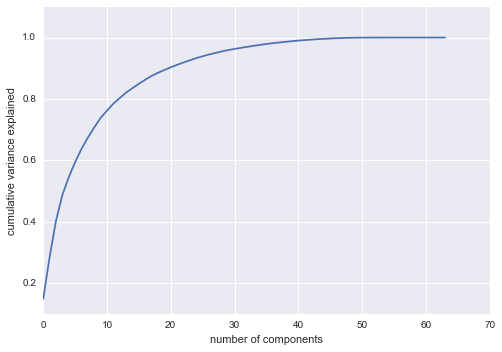

In [9]:
pca = PCA().fit(digits.data)
plt.plot( np.cumsum(pca.explained_variance_ratio_) )
plt.xlabel( 'number of components' )
plt.ylabel( 'cumulative variance explained' );

Looking at this plot for a high dimensional dataset helps to understand the redundacy in multiple observations

### PCA as noise filter

First, look the original data

In [10]:
def plot_digits( data ):
    fig, axes = plt.subplots( 4, 10, figsize = (10,4 ),
                              subplot_kw = { 'xticks' : [], 'yticks': []},
                              gridspec_kw = { 'hspace' : 0.1, 'wspace': 0.1 } )
    
    for i, ax in enumerate( axes.flat ):
        ax.imshow( data[i].reshape(8,8),
                   cmap = 'binary', interpolation = 'nearest', clim = (0,16))

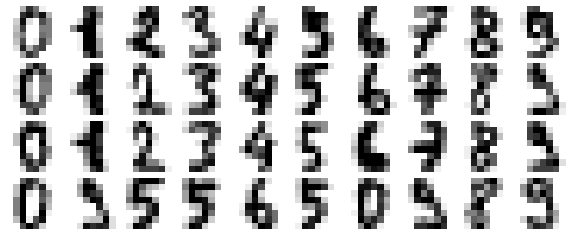

In [11]:
plot_digits( digits.data )

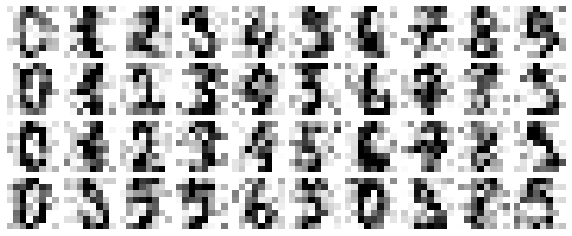

In [12]:
np.random.seed( 42 )
noisy = np.random.normal( digits.data, 4 )
plot_digits( noisy )

In [13]:
pca = PCA(0.5).fit( noisy )
print( pca.n_components_ ,
       pca.n_components)

12 0.5


Here 50% of the variance amounts 12 principal components

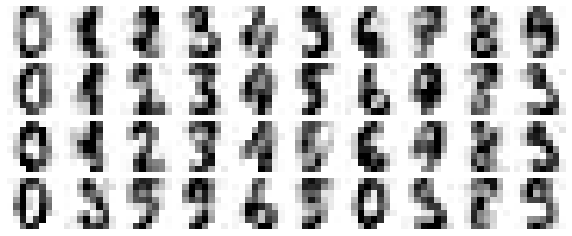

In [14]:
components = pca.transform( noisy )
filtered = pca.inverse_transform( components )
plot_digits( filtered )

Projected data is much cleaner (with only 50 % of the variance)

## Example: Eigenfaces

In [16]:
from sklearn.datasets import fetch_lfw_people

In [17]:
faces = fetch_lfw_people( min_faces_per_person= 60 )

In [19]:
print( faces.target_names )
print( faces.images.shape )

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


We will use randomized PCA that implents a randomized meothod to quickly approximater the first N principal componetns. This is useful for high-dimensional data like the faces dataset.

In [21]:
from sklearn.decomposition import RandomizedPCA

In [22]:
pca = RandomizedPCA( n_components = 150)
pca.fit(faces.data)

RandomizedPCA(copy=True, iterated_power=3, n_components=150,
       random_state=None, whiten=False)

Let's see how those eigen-faces look like

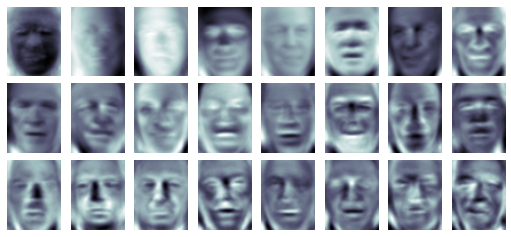

In [30]:
fig, axes = plt.subplots( 3, 8, figsize = (9,4), 
                        subplot_kw = { 'xticks' : [], 'yticks': []},
                        gridspec_kw = { 'hspace' : 0.1, 'wspace': 0.1 })

for i, ax in enumerate( axes.flat ):
    ax.imshow( pca.components_[i].reshape(62,47), cmap = 'bone' )

#### Cumulative variance explained 

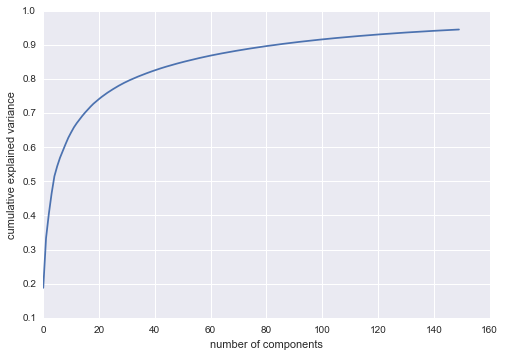

In [32]:
plt.plot( np.cumsum( pca.explained_variance_ratio_) )
plt.xlabel( 'number of components' )
plt.ylabel( 'cumulative explained variance' );

In [33]:
# Compute the components and projected faces
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

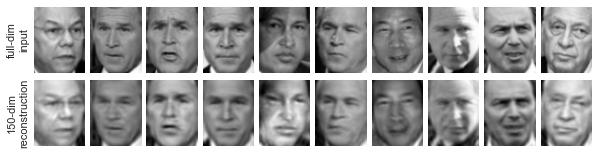

In [34]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');